In [17]:
import os
import boto3

from IPython.display import Image

s3 = boto3.client('s3')
dynamodb = boto3.resource('dynamodb')
client = boto3.client('dynamodb')

myBucket = 'antoine-working-bucket'
myTable = 'antoine-working-table'
myPartitionKey = 'cameraId'
mySortKey = 'scrapeTime'

cameraId = raw_input('cameraId: ')
scrapeTime = raw_input('scrapeTime: ')

#cameraId = 'TL-405957'
#scrapeTime = '2016-07-27T09:43:45.144Z'

aPartitionKey = cameraId
aSortKey = scrapeTime
myKey = str(aPartitionKey) + "_" + str(aSortKey) + '.jpg'

cameraId: TL-405957
scrapeTime: 2016-07-27T09:43:45.144Z


In [18]:
def getImage(awsBucket, awsKey, filePath = "/Users/antoine/" + str(myKey)):
    s3.download_file(Bucket=awsBucket, Key=awsKey, Filename= filePath)
    return Image(filePath)

def getItem(awsTable, partitionKey, sortKey, partitionKeyValue, sortKeyValue):
    response = dynamodb.Table(awsTable).get_item(
        Key={
            str(partitionKey): partitionKeyValue,
            str(sortKey): sortKeyValue
        }
    )
    item = response['Item']
    print(item)

In [19]:
getItem(myTable, myPartitionKey, mySortKey, aPartitionKey, aSortKey)

{u'info': {u'weather': u'Heavy rain', u'site': u'Pangbourne', u'temperature': u'17\xb0C'}, u'scrapeTime': u'2016-07-27T09:43:45.144Z', u'cameraId': u'TL-405957'}


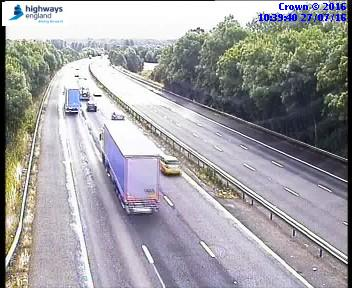

In [20]:
getImage(myBucket, myKey, filePath="/Users/antoine/" + str(myKey))